# **Discrete Cosine Transform (DCT) e la compressione di immagini**
Autore: Alex Di Stefano S4638131

Gli obiettivi di tale progetto sono: studiare la DCT, esporre il suo utilizzo più comune, ossia la compressione di immagini JPEG con perdita di informazione, e testarla.



##**Introduzione**

La DCT è una trasformata simile alla DFT, ma fa solo uso di valori reali. Questa trasformata è capace di esprimere una serie di dati come somme di funzioni armoniche coseno a diverse frequenze. È equivalente a una DFT di lunghezza circa doppia e a coefficienti reali, che opera su funzioni reali e pari (dato che la trasformata di Fourier di una funzione reale e pari è reale e pari a sua volta).

La Discrete Cosine Transform è la funzione più diffusa per quanto riguarda la compressione spaziale, in grado di rilevare le variazioni di informazione tra un'area e quella contigua di un'immagine trascurando le rindondanze.


##**Formula DCT 1D**

>La DCT in una dimensione, per una successione di lunghezza N, è definita come:
>
>## 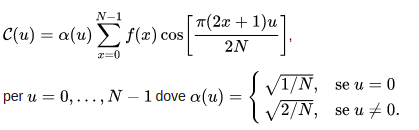

## **Formula DCT 2D**

>Per u,v = 0, 1, 2, ..., N-1 e α(u), α(v) definite come nel caso 1D, si ha che:
>
>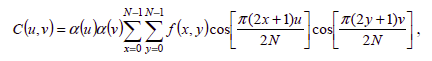
>
>E la sua inversa è definita come:
>
>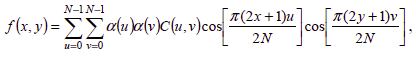

##**Descrizione e applicazione**

###Descrizione
>La DCT è usata nella compressione di immagini digitali con perdita d'informazione. Ad esempio, l'algoritmo JPEG è basato sulla trasformata discreta del coseno bidimensionale, che viene applicata su blocchi di pixel 8x8 dove i risultati sono calcolati e compressi.
>
>Le immagini digitali tendenzialmente avranno dei pixel vicini molto simili tra loro e quelle sono informazioni rindondanti e, come detto in precedenza, la DCT ci permette di non considerare tali informazioni permettendoci di studiare solo valori scorrelati tra loro e quindi codificabili in maniera indipendente.

###Applicazione
>In modo simile alla trasformata discreta di Fourier, la DCT trasforma un segnale o un immagine dal dominio dello spazio al dominio delle frequenze, inoltre la DCT può approssimare bene le linee con meno coefficienti e aiuta a separare l'immagine in parti di diversa importanza rispetto alla qualità visiva dell'immagine.
>
>Suddividendo l'immagine in blocchi di pixel e osservando le armoniche in ogni blocco si ha che, come risultato in analisi, abbiamo una matrice di coefficienti dove spostandosi verso il basso e verso destra si trovano i coefficienti con componenti di frequenza sempre maggiori. Possiamo comprimere un'immagine mascherando e troncando i coefficienti a frequenze superiori a quelle che ci interessano.
>
>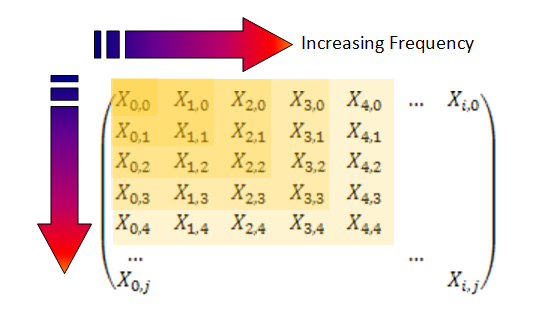

###Separabilità
>Una delle proprietà della DCT bidimensionale è che è separabile ossia può essere separato in una coppia di DCT 1D.
In sostanza, per ottenere la DCT 2D di un blocco viene prima eseguita una DCT 1D sulle righe e poi viene eseguita un'altra DCT 1D sulle colonne del blocco risultante.
Lo stesso vale per la sua inversa.

###Compressione
>Utilizzando una trasformata DCT l'immagine viene spostata nel dominio della frequenza e, a seconda della compressione richiesta, i coefficienti di frequenza più elevati del segnale vengono mascherati e rimossi (l'equivalente digitale dell'applicazione di un filtro analogico passa basso). Quando l'immagine viene ricreata utilizzando i coefficienti troncati le componenti a frequenza più elevata non sono presenti.

###Confronto DCT e DFT
>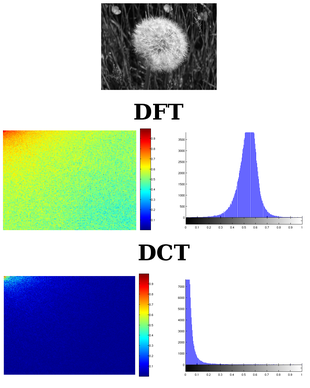
>
>
>Come possiamo notare lo spettro della DFT è più diffuso dello spettro della DCT e la DCT concentra le informazioni nelle basse frequenze.

##**Uso della DCT 2D per la compessione di un immagine JPEG con perdita (block-based implementation)**


Imports
-------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
import os

from skimage.color import rgb2gray
from scipy.fftpack import dct, idct
from matplotlib import colors
from cv2 import imread, imwrite

Definizione della DCT 2D e della sua inversa
--------------------------------------------



In [3]:
# Trasformata discreta del coseno
# Lavoro prima lungo le righe e poi lungo le colonne dell'immagine/della porzione dell'immagine passata come argomento
def dct2(x):
    y = dct(dct(x, axis=0, norm='ortho'), axis=1, norm='ortho')
    return y

# Inversa della trasformata discreta del coseno
# Lavoro prima lungo le righe e poi lungo le colonne dell'immagine/della porzione dell'immagine passata come argomento
def idct2(y):
    x = idct(idct(y, axis=0, norm='ortho'), axis=1, norm='ortho')
    return x

Caricamento dell'immagine
-------------------------

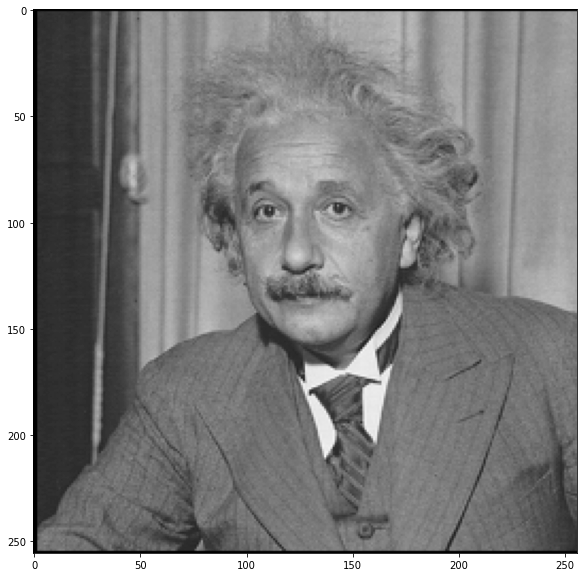

In [4]:
# Carico l'immagine e ne faccio il plot per verificare il corretto caricamento
img = rgb2gray(imread('einstein.jpeg').astype(float))
plt.figure(figsize = (10,10))
plt.imshow(img, cmap='gray')

Calcolo della DCT 2D
--------------------

In [5]:
# Estraggo altezza e larghezza dell'immagine caricata
imgSize = img.shape

# Dichiaro una matrice di 0
DCT = np.zeros(imgSize)

# Eseguo la trasformata discreta del coseno per ogni blocco 8x8 dell'immagine
for i in np.arange(0, imgSize[0], 8):
    for j in np.arange(0, imgSize[1], 8):
        DCT[i:(i+8), j:(j+8)] = dct2(img[i:(i+8), j:(j+8)])

Visualizzazione dell'applicazione della DCT 2D
----------------------------------------------

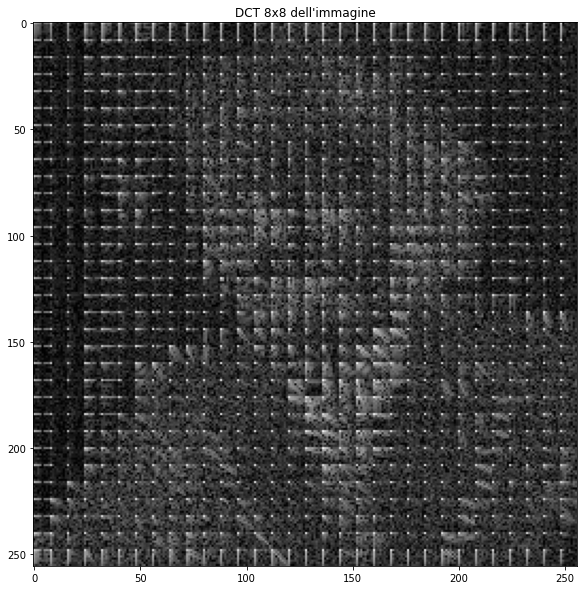

In [6]:
# Eseguo il plot del risultato dell'applicazione della DCT su tutti i blocchi dell'immagine
# Ciò che visualizzo sono tutti i coefficienti che compongono l'immagine
plt.figure(figsize = (10,10))
plt.title("DCT 8x8 dell'immagine")
plt.imshow(np.log10(1 + abs(DCT)), cmap='gray')

Visualizzazione dell'energia in un blocco 8x8
---------------------------------------------

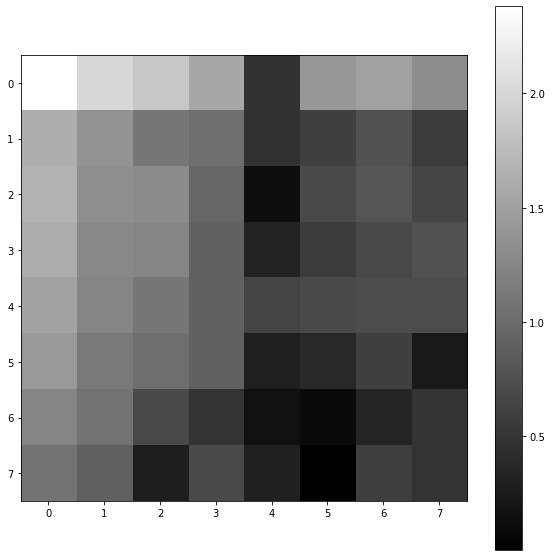

In [7]:
pos = 0 # Indica la posizione da dove parto per il plot del blocco 8x8, modificare per sposarsi di blocco
plt.figure(figsize = (10,10))
plt.imshow(np.log10(1 + abs(DCT[pos:pos+8, pos:pos+8])), cmap='gray')
plt.colorbar()

Spiegazione della compattazione dell'energia
--------------------------------------

L'efficacia di una trasformata può essere misurata direttamente dalla sua capacità di comprimere i dati di input nel minor numero possibile di coefficienti. Ciò consente di scartare coefficienti con ampiezze relativamente piccole senza introdurre distorsione visiva nell'immagine ricostruita.

La trasformata discreta del coseno ha una proprietà di compattazione dell'energia molto efficace, ovvero concentra la maggior parte dell'energia nei primi coefficienti della trasformata.
Prendiamo ad esempio questa matrice M in input

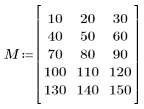

Applicando la DCT ad M si ha come risultato la seguente matrice Mt

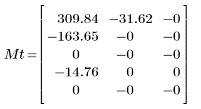

Un'immagine ha la sua energia distribuita tra tutti i vari pixel, applicando la DCT l’energia verrà ridistribuita solitamente nell’angolo in alto a sinistra.
Infatti, la matrice risultante mostra che la maggior parte dell'energia, correlata ai valori di coefficiente, è concentrata nei primi elementi.



Visualizzazione dell'applicazione della DCT 2D dopo aver applicato la soglia
---------------------------------------------------------------------

8.31756591796875 % coefficienti rimasti dopo aver applicato la soglia


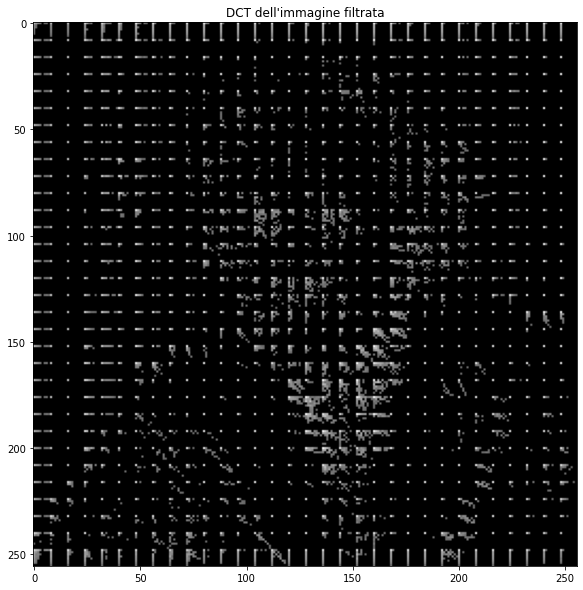

In [8]:
# Più si aumenta la soglia più diminuisce la percentuale dei coefficienti che riesco a tenere e quindi aumenta la perdita d'informazione
soglia = 20  # Cambiare il valore per modificare il livello di compressione

# Moltiplicazione tra la matrice della trasformata del coseno e la matrice booleana data dalla condizione.
# La matrice risultate sarà una matrice dove verranno tenuti solo i valori corrispondenti alla
# posizione True, i valori che corrispondono a una posizione False verranno azzerati.
dctFiltered = DCT * (abs(DCT) > soglia)

# Eseguo il plot della DCT 8x8 dell'immagine dopo averla filtrata
plt.figure(figsize = (10,10))
plt.title("DCT dell'immagine filtrata")
plt.imshow(np.log10(1 + abs(dctFiltered)), cmap='gray')

# Calcolo la percentuale dei coefficienti rimasti dopo aver applicato la soglia
percentCoeff = (np.sum(dctFiltered != 0.0) / (imgSize[0]*imgSize[1])) * 100
print(percentCoeff,"% coefficienti rimasti dopo aver applicato la soglia")

Spiegazione della soglia
------------------------


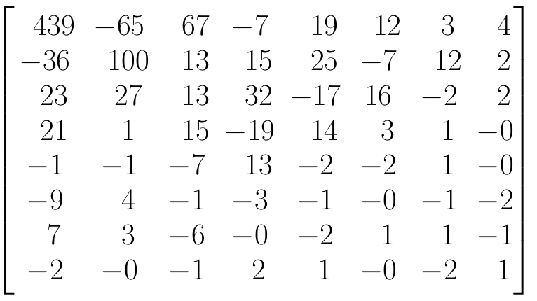

L'immagine sovrastrante mostra una matrice 8x8 ottenuta calcolando la DCT di un blocco 8x8 della matrice di un'immagine.
Gli elementi in alto a sinistra sono quelli che corrispondono alle basse frequenze mentre quelli in basso a destra corrispondono alle alte frequenze. Nelle basse frequenze i valori sono grandi, viceversa  nelle alte frequenze i valori sono piccoli. Quindi per decidere il grado di compressione andrò ad applicare una determinata soglia che servirà per eliminare le alte frequenze ponendo uguale a zero i coefficienti corrispondenti. Più è alta la soglia, più saranno i coefficienti scartati e maggiore sarà la compressione dell'immagine (quindi sarà maggiore la perdita d'informazione).

Visualizzazione dell'energia di un blocco 8x8 dopo l'applicazione della soglia
---------------------------------------------

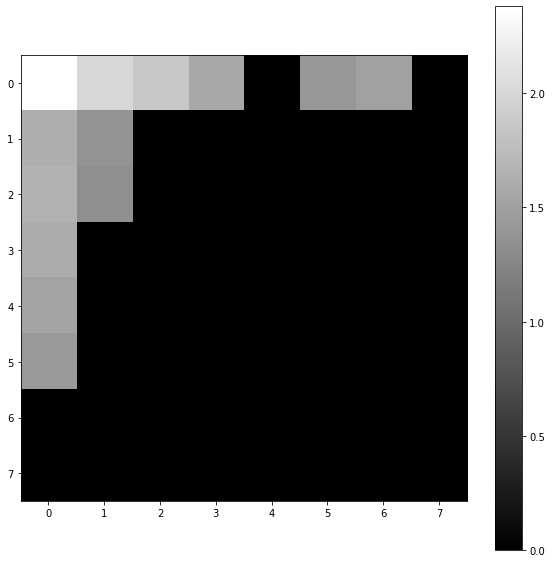

In [9]:
pos = 0 # Indica la posizione da dove parto per il plot del blocco 8x8, modificare per sposarsi di blocco
plt.figure(figsize = (10,10))
plt.imshow(np.log10(1 + abs(dctFiltered[pos:pos+8, pos:pos+8])), cmap='gray')
plt.colorbar()

Calcolo dell'inversa della DCT 2D (per ottenere l'immagine compressa)
---------------------------------------------------------------------



In [10]:
# Dichiaro matrice di 0 che conterrà l'immagine compressa
imgDCT = np.zeros(imgSize)

# Applico l'inversa della DCT ad ogni blocco 8x8 della DCT filtrata per ottenere l'immagine compressa
for i in np.arange(0, imgSize[0], 8):
    for j in np.arange(0, imgSize[1], 8):
        imgDCT[i:(i+8), j:(j+8)] = idct2(dctFiltered[i:(i+8), j:(j+8)])

Confronto dell'immagine originale con quella compressa
------------------------------------------------------

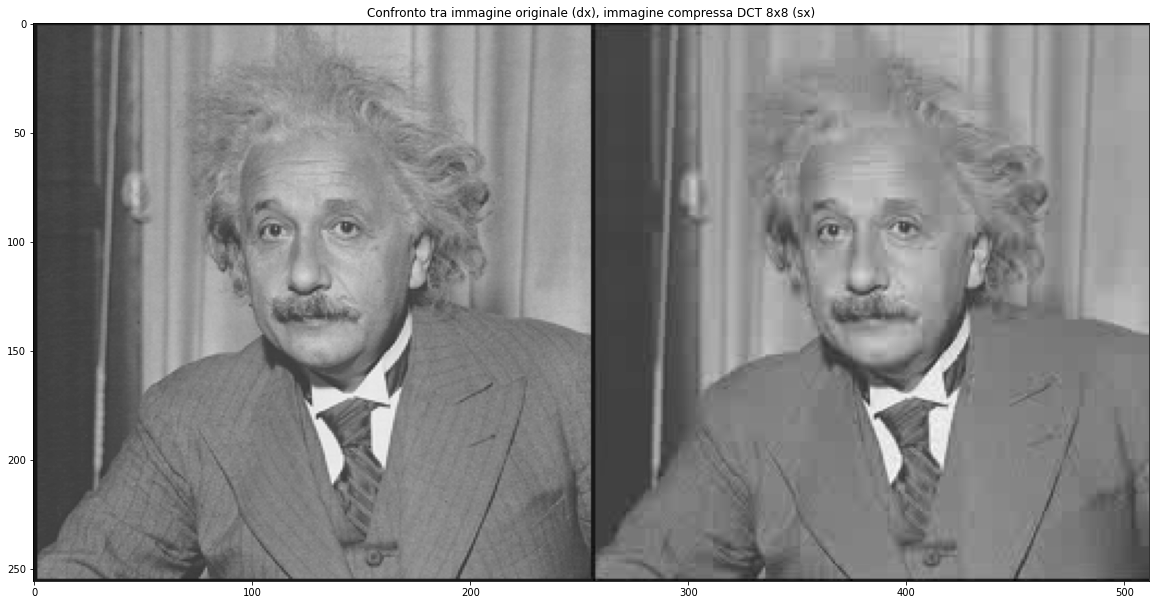

In [11]:
imgComparison = np.concatenate((img, imgDCT), axis=1)
plt.figure(figsize=(20,20))
plt.title("Confronto tra immagine originale (dx), immagine compressa DCT 8x8 (sx)")
plt.imshow(imgComparison, cmap='gray')
plt.show()

A scopo dimostrativo stampo le dimensioni delle immagini per compararle

In [12]:
# Funzione ausiliaria per restituire la dimensione del file passato come argomento
def getSize(filename):
    st = os.stat(filename)
    return st.st_size

# Salvo l'immagine compressa
imwrite('./imgCompressed.jpeg', imgDCT)

# Cambiare con i nomi opportuni per il corretto funzionamento
print("Dimensione immagine originale:", str(getSize("einstein.jpeg")), "bytes") 
print("\nDimensione immagine compressa:", str(getSize("imgCompressed.jpeg")), "bytes")

Dimensione immagine originale: 42650 bytes

Dimensione immagine compressa: 11468 bytes


##**Conclusioni**

Dopo aver diviso l'immagine in blocchi 8x8 e una volta applicata la DCT a tutti i blocchi dell'immagine, avendo scelto una soglia atta a non considerare tutto quello che c'è sotto ad essa per regolare la compressione dell'immagine, possiamo notare come la trasformazione, dopo aver filtrato, sia più vuota in modo proporzionale alla soglia scelta in precedenza. Questo perché i coefficienti al di sotto sono stati azzerati.
L'immagine compressa risultante rispecchia ciò che ci aspettiamo da un'applicazione del genere, ossia un'immagine più leggera e quindi compressa ma con una perdita d'informazione che aumenta all'aumentare del valore di soglia.

##**Fonti**


* Syed Ali Khayam, The Discrete Cosine Transform (DCT): Theory and Application: http://www.egr.msu.edu/waves/people/Ali_files/DCT_TR802.pdf

* UniGe: https://www.dima.unige.it/~delprete/APPLICATA/JPEG%20LUCIDI/JPEGcomesifa.html

* UniVr: https://www.di.univr.it/documenti/OccorrenzaIns/matdid/matdid027832.pdf

* UniUd: http://users.dimi.uniud.it/~antonio.dangelo/MMS/2013/lessons/L11lecture.pdf

Inoltre parte del lavoro ispirato a: https://inst.eecs.berkeley.edu/~ee123/sp16/Sections/JPEG_DCT_Demo.html